In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("credit_card.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [8]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
#let's fix credit limit with the same way
df['CREDIT_LIMIT'].isnull().sum()

1

In [10]:
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()
df['CREDIT_LIMIT'].isnull().sum()

0

In [11]:
# drop the CUST_ID column because we have no need for it
df.drop(['CUST_ID'],axis = 1, inplace = True)

In [12]:
#Let's see if length changed from 18 to 17
n = len(df.columns)
n

17

In [13]:
#Columns Remaining
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

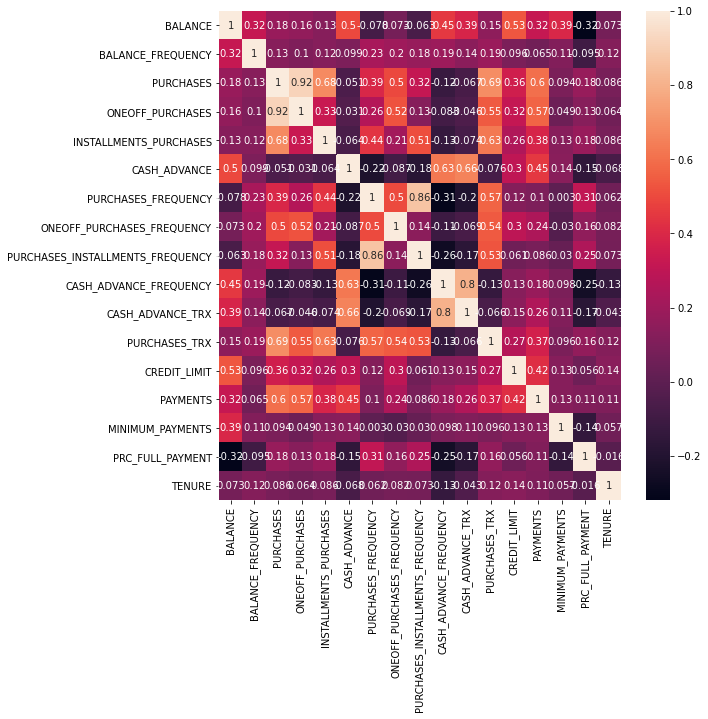

In [14]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

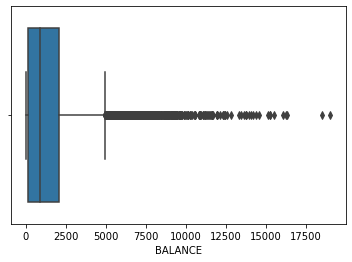

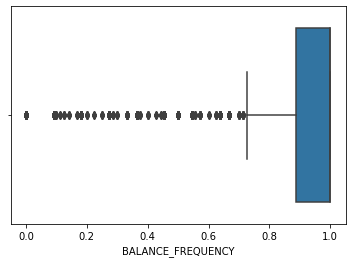

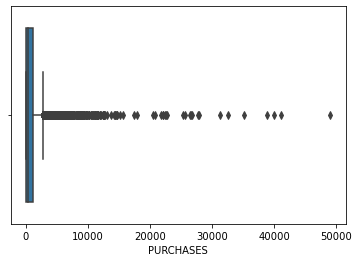

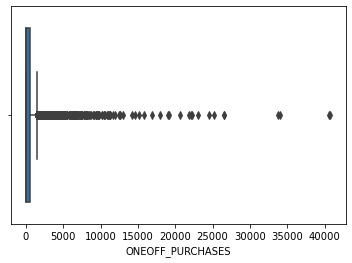

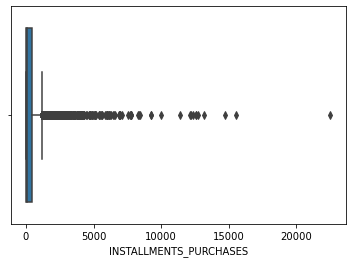

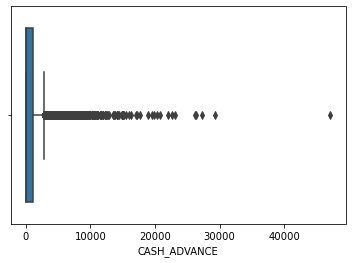

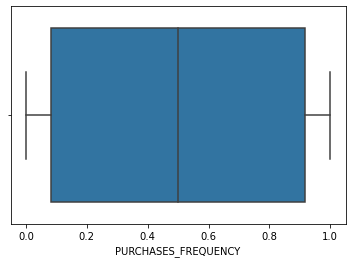

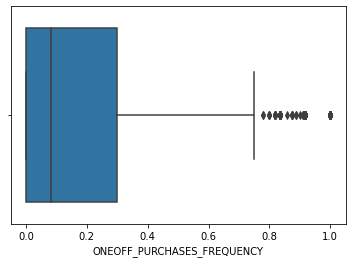

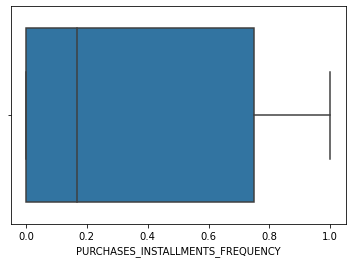

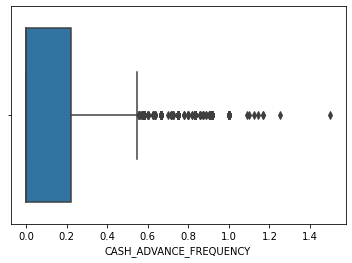

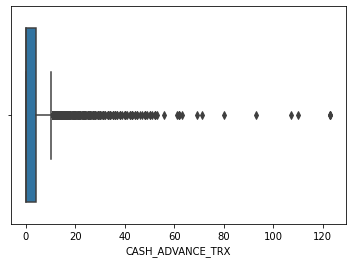

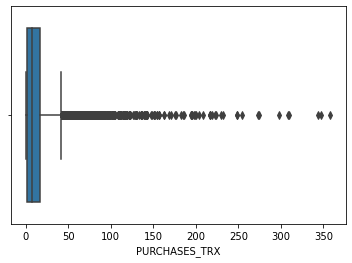

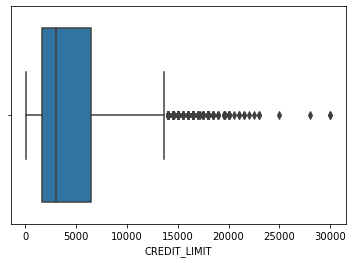

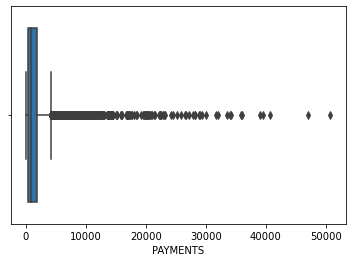

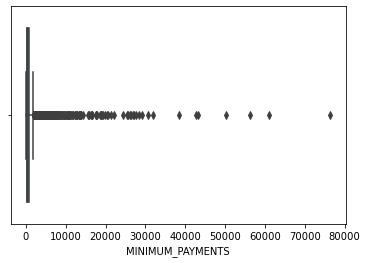

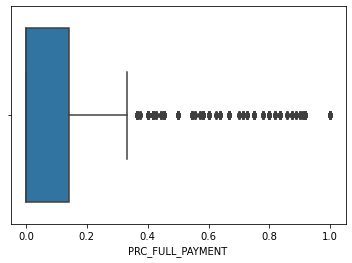

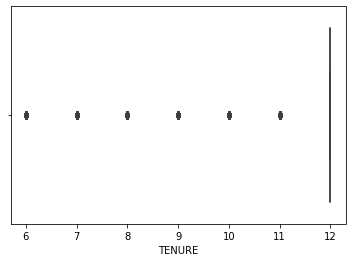

In [15]:
for col in df:
    plt.figure()
    sns.boxplot(df[col])
    plt.show()

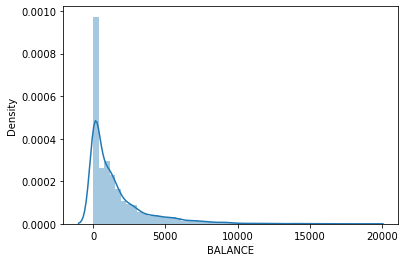

2.392984897743557


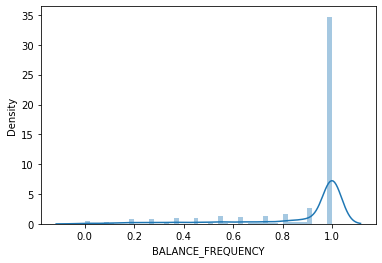

-2.022926407947498


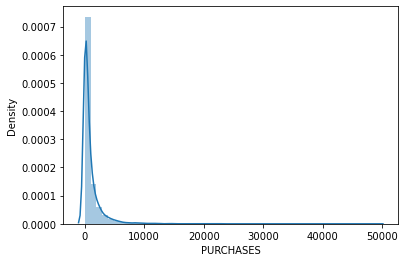

8.14290403970826


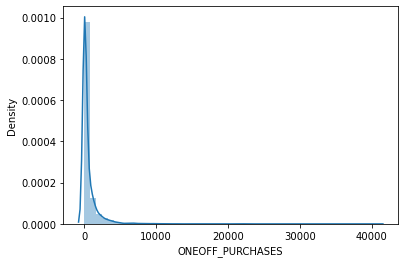

10.043399272872994


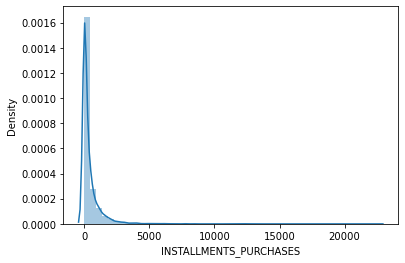

7.297896535603957


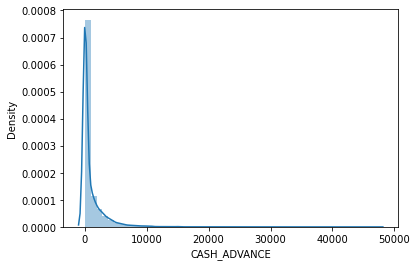

5.165743121623766


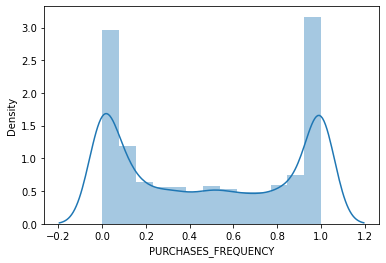

0.060154151997082954


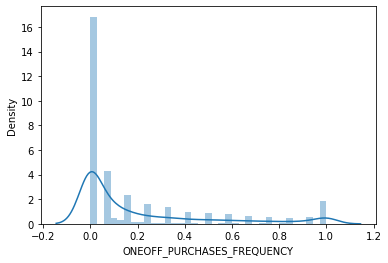

1.535355406271309


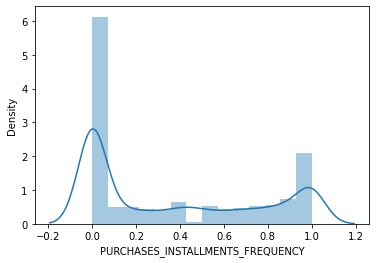

0.5091158200492595


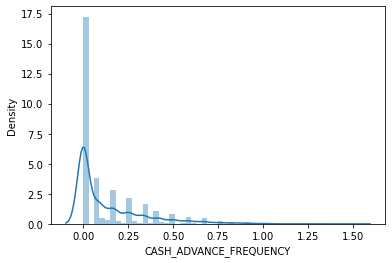

1.828379768476593


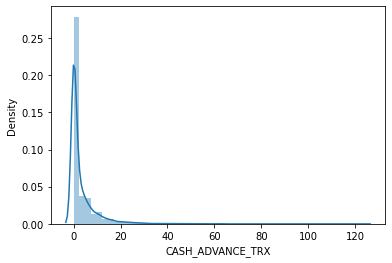

5.720339281754528


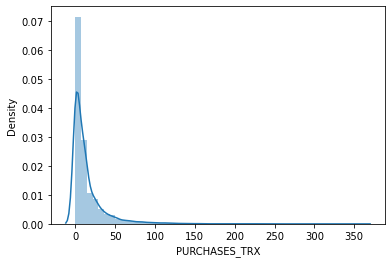

4.629879142324137


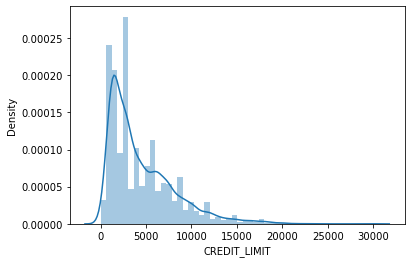

1.5222938500528531


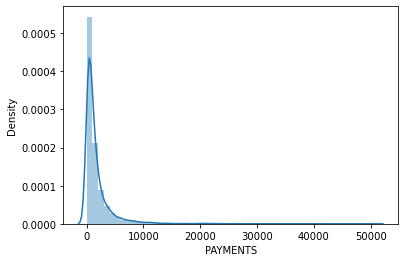

5.906629644423578


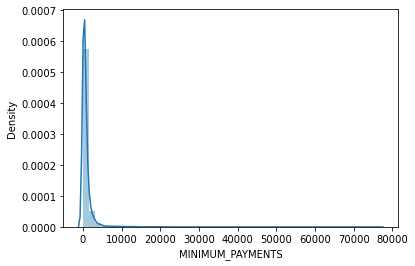

13.86503301346577


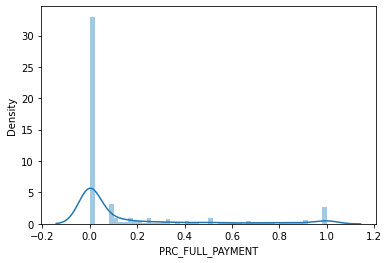

1.942494313531204


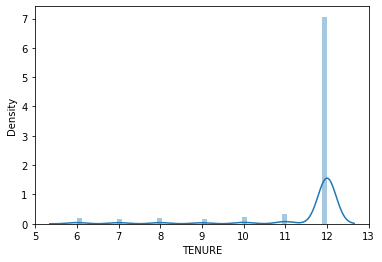

-2.942524021534386


In [16]:
for col in df:
    plt.figure()
    sns.distplot(df[col])
    plt.show()
    print(skew(df[col]))

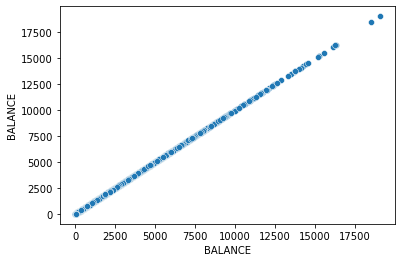

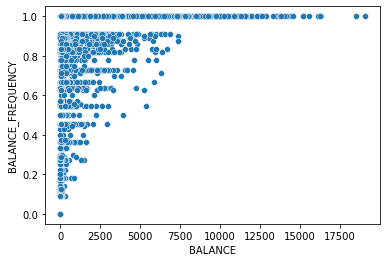

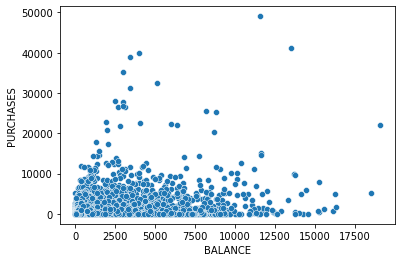

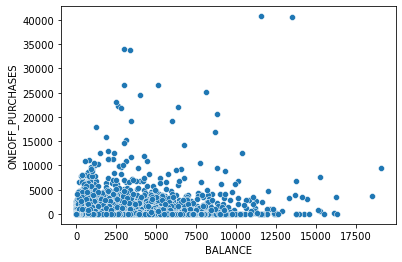

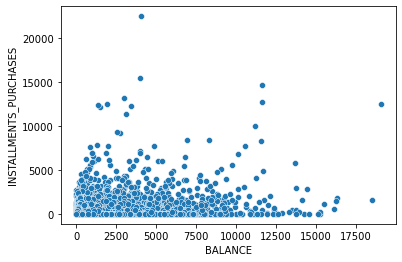

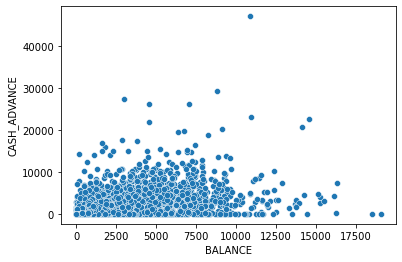

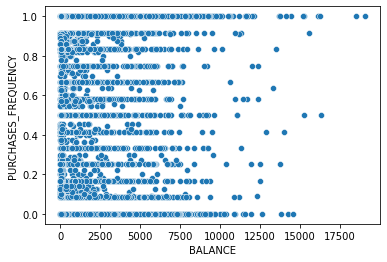

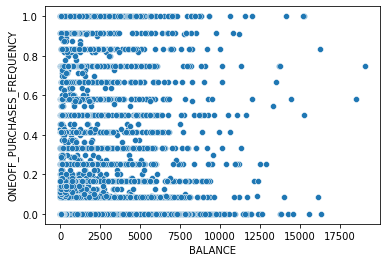

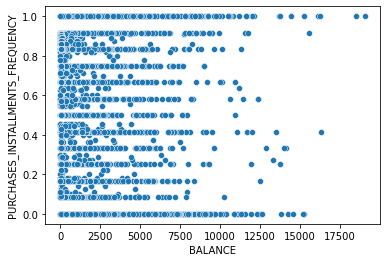

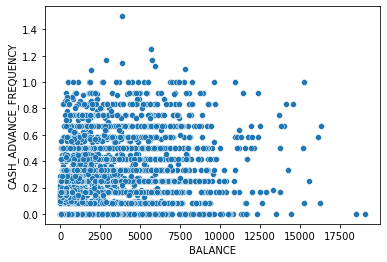

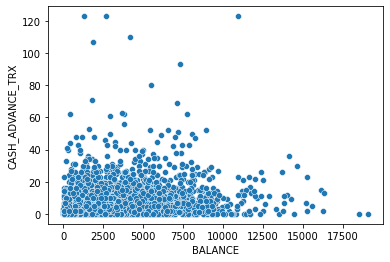

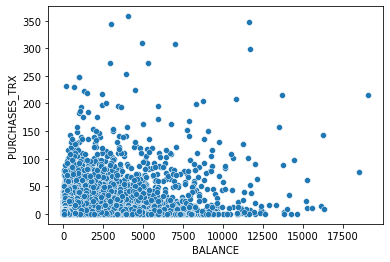

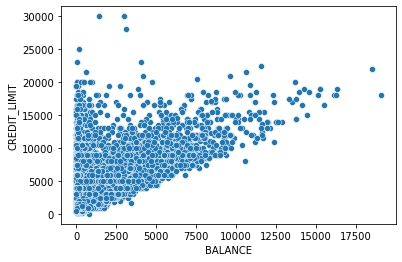

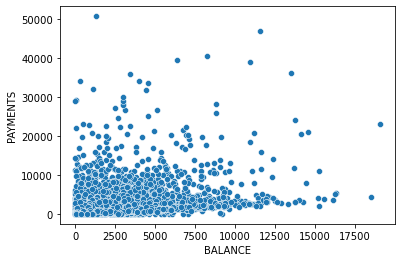

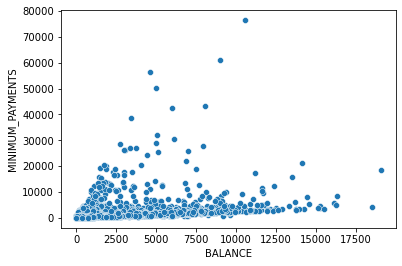

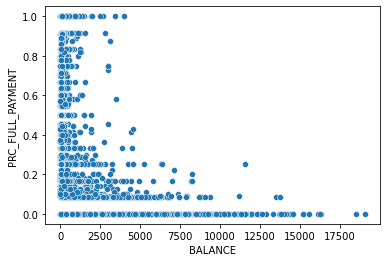

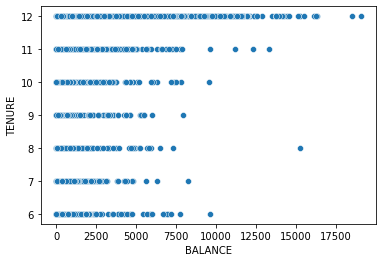

In [17]:
for col in df:
    plt.figure()
    sns.scatterplot(data=df,x="BALANCE",y=col)
    plt.show()

In [18]:
# elbow method
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [19]:
#Scale and fit our data
ss = StandardScaler()
df1 = df.copy()
df1 = ss.fit_transform(df1)

In [20]:
df1.shape

(8950, 17)

In [21]:
kel = KMeans(n_clusters=5,n_init=10,max_iter=300,random_state=1)

In [22]:
kel.fit(df1)

KMeans(n_clusters=5, random_state=1)

In [23]:
kel.inertia_

91503.52407050133

In [24]:
centroids = kel.cluster_centers_

In [25]:
centroids

array([[-0.44343388,  0.1022626 , -0.09902417, -0.2574126 ,  0.23872945,
        -0.38204695,  0.90933839, -0.40105603,  1.07773077, -0.4855788 ,
        -0.37236467,  0.07452274, -0.35469024, -0.27655962, -0.08143609,
         0.40895504, -0.04701921],
       [ 1.48280346,  0.38261337, -0.2354483 , -0.17256111, -0.23978326,
         1.76461124, -0.51343353, -0.23532249, -0.45246862,  1.78779926,
         1.6842327 , -0.29116472,  0.85240422,  0.65874663,  0.49760133,
        -0.40146441, -0.1081647 ],
       [ 0.1579896 ,  0.43013822,  0.89630805,  0.8363882 ,  0.58264022,
        -0.29853648,  1.08082139,  1.77479241,  0.56096906, -0.3849051 ,
        -0.30697369,  1.15922139,  0.67774354,  0.35994495, -0.01250149,
         0.37877925,  0.27735409],
       [-0.24125417, -0.33392084, -0.33968958, -0.2212226 , -0.39662898,
        -0.16807799, -0.81619689, -0.35486265, -0.75233815, -0.07440119,
        -0.1462522 , -0.47345524, -0.31506291, -0.2515371 , -0.11227108,
        -0.28741405

In [26]:
centroids_df = pd.DataFrame(centroids,columns=["A","B","C","D","E","G","H","I","J","K","L","M","N","O","P","Q","R"])

In [27]:
centroids_df

,A,B,C,D,E,G,H,I,J,K,L,M,N,O,P,Q,R
0,-0.443434,0.102263,-0.099024,-0.257413,0.238729,-0.382047,0.909338,-0.401056,1.077731,-0.485579,-0.372365,0.074523,-0.354690,-0.276560,-0.081436,0.408955,-0.047019
1,1.482803,0.382613,-0.235448,-0.172561,-0.239783,1.764611,-0.513434,-0.235322,-0.452469,1.787799,1.684233,-0.291165,0.852404,0.658747,0.497601,-0.401464,-0.108165
2,0.157990,0.430138,0.896308,0.836388,0.582640,-0.298536,1.080821,1.774792,0.560969,-0.384905,-0.306974,1.159221,0.677744,0.359945,-0.012501,0.378779,0.277354
3,-0.241254,-0.333921,-0.339690,-0.221223,-0.396629,-0.168078,-0.816197,-0.354863,-0.752338,-0.074401,-0.146252,-0.473455,-0.315063,-0.251537,-0.112271,-0.287414,-0.045438
4,1.430238,0.419467,6.915048,6.083034,5.172266,0.038778,1.090699,1.879303,1.049413,-0.249227,-0.038166,4.646228,2.198371,4.783704,1.080945,0.824001,0.334613


In [28]:
# K-values and elbow methods

wcss=[]

In [29]:
for k in range(1,30):
    ke2 = KMeans(n_clusters=k,n_init=10,max_iter=300,random_state=1)
    ke2.fit(df1)
    wcss.append(ke2.inertia_)

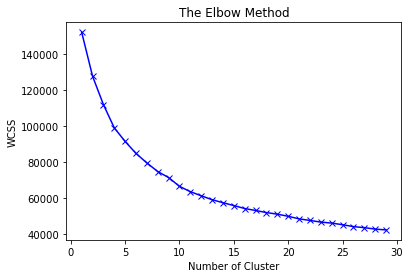

In [30]:
plt.plot(range(1,30),wcss,"bx-")
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

In [31]:
# Model

ke3 = KMeans(n_clusters=4,n_init=10,max_iter=300,random_state=1)

In [32]:
labels = ke3.fit_predict(df1)

In [33]:
ke3.inertia_

99074.04273737562

In [34]:
centroid = ke3.cluster_centers_
centroid

array([[ 1.46228935e+00,  3.84194261e-01, -2.33906892e-01,
        -1.63392858e-01, -2.52974788e-01,  1.69479172e+00,
        -5.02934639e-01, -2.11753522e-01, -4.48596380e-01,
         1.74742370e+00,  1.62026589e+00, -2.82591424e-01,
         8.43629386e-01,  6.07668715e-01,  4.91842442e-01,
        -4.05867768e-01, -9.53066946e-02],
       [-3.21755013e-01,  2.42492148e-01,  1.09083463e-01,
         9.39008574e-04,  2.55973933e-01, -3.66732314e-01,
         9.83944240e-01,  3.17282537e-01,  8.74358420e-01,
        -4.63030429e-01, -3.60443140e-01,  2.97022123e-01,
        -7.70764637e-02, -1.38802081e-01, -9.18159333e-02,
         3.95230306e-01,  5.76539298e-02],
       [ 9.54484507e-01,  4.62693629e-01,  3.12584465e+00,
         2.71325131e+00,  2.40646962e+00, -1.55090594e-01,
         1.13633760e+00,  1.79865349e+00,  1.06591778e+00,
        -3.19095705e-01, -1.70458235e-01,  3.00325068e+00,
         1.42988161e+00,  1.91909626e+00,  4.77420629e-01,
         4.54702830e-01,  3.2

In [35]:
centroids_df = pd.DataFrame(centroids,columns=["A","B","C","D","E","G","H","I","J","K","L","M","N","O","P","Q","R"])

In [36]:
centroids_df

,A,B,C,D,E,G,H,I,J,K,L,M,N,O,P,Q,R
0,-0.443434,0.102263,-0.099024,-0.257413,0.238729,-0.382047,0.909338,-0.401056,1.077731,-0.485579,-0.372365,0.074523,-0.354690,-0.276560,-0.081436,0.408955,-0.047019
1,1.482803,0.382613,-0.235448,-0.172561,-0.239783,1.764611,-0.513434,-0.235322,-0.452469,1.787799,1.684233,-0.291165,0.852404,0.658747,0.497601,-0.401464,-0.108165
2,0.157990,0.430138,0.896308,0.836388,0.582640,-0.298536,1.080821,1.774792,0.560969,-0.384905,-0.306974,1.159221,0.677744,0.359945,-0.012501,0.378779,0.277354
3,-0.241254,-0.333921,-0.339690,-0.221223,-0.396629,-0.168078,-0.816197,-0.354863,-0.752338,-0.074401,-0.146252,-0.473455,-0.315063,-0.251537,-0.112271,-0.287414,-0.045438
4,1.430238,0.419467,6.915048,6.083034,5.172266,0.038778,1.090699,1.879303,1.049413,-0.249227,-0.038166,4.646228,2.198371,4.783704,1.080945,0.824001,0.334613


In [37]:
labels

array([3, 0, 1, ..., 1, 3, 3])

In [38]:
df_new = pd.concat([df,pd.DataFrame({"lables":labels})],axis=1)

In [39]:
df_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,lables
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


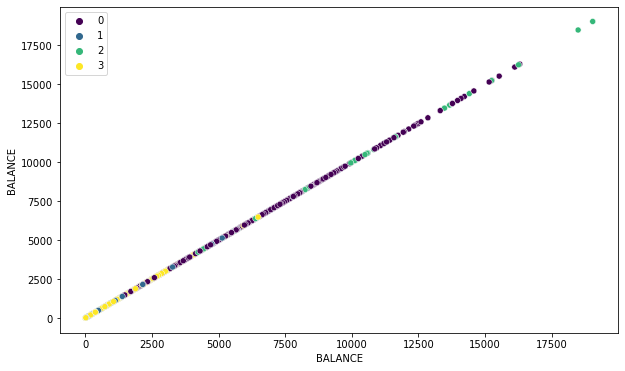

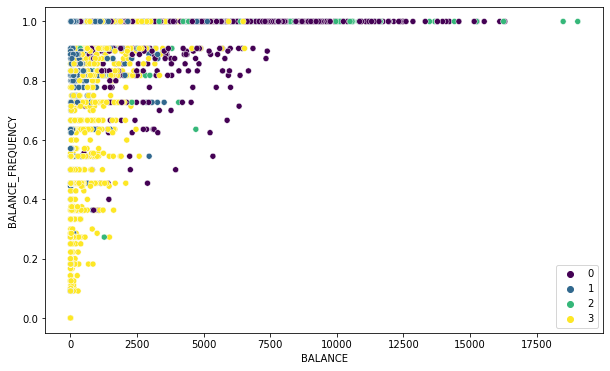

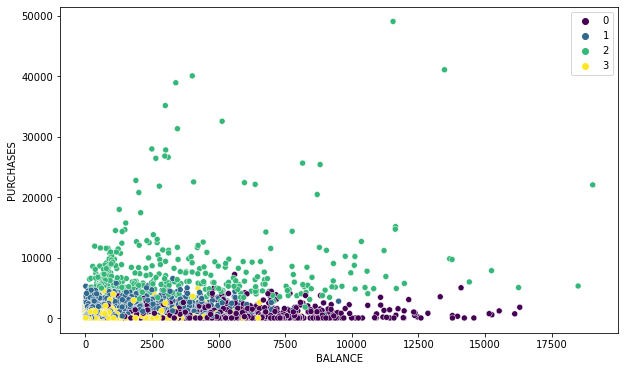

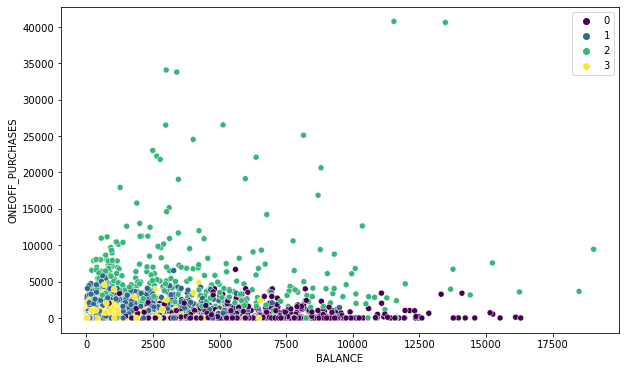

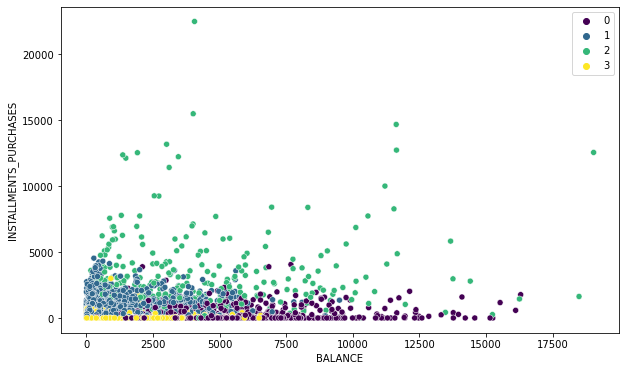

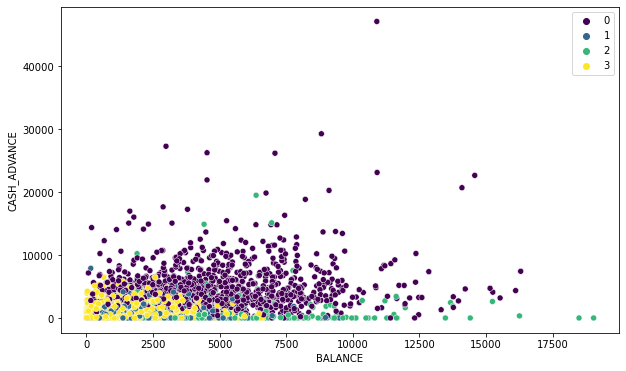

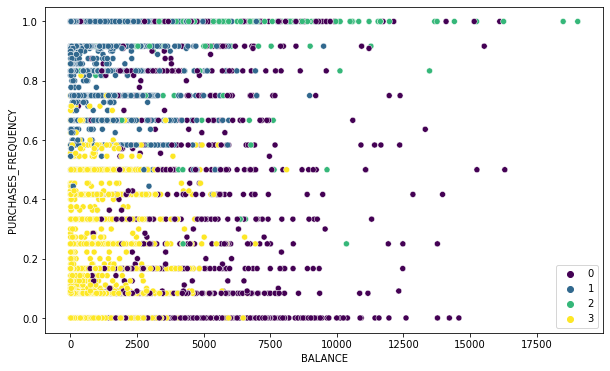

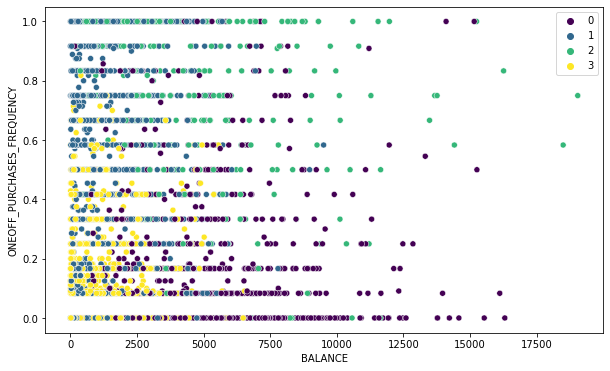

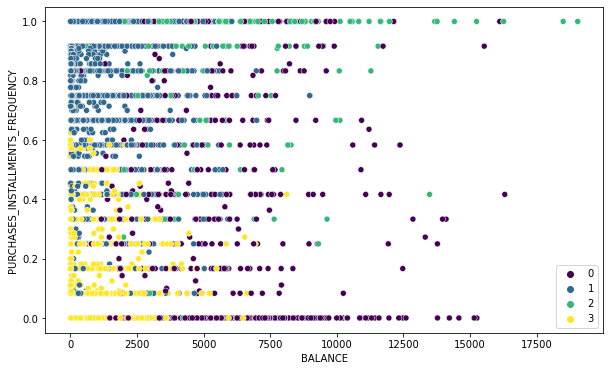

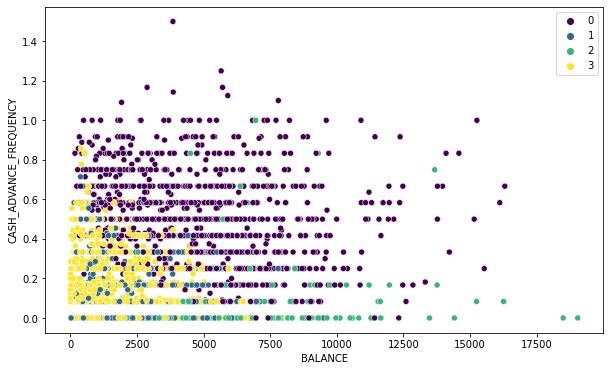

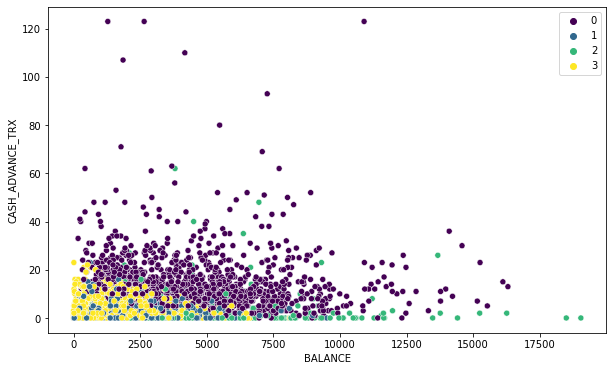

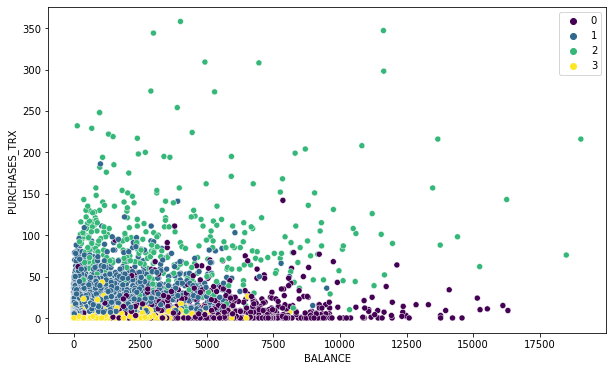

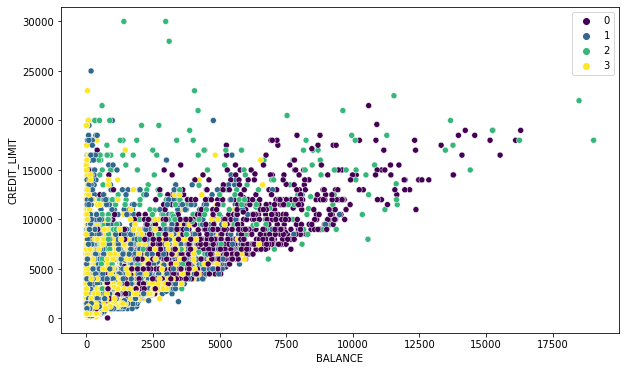

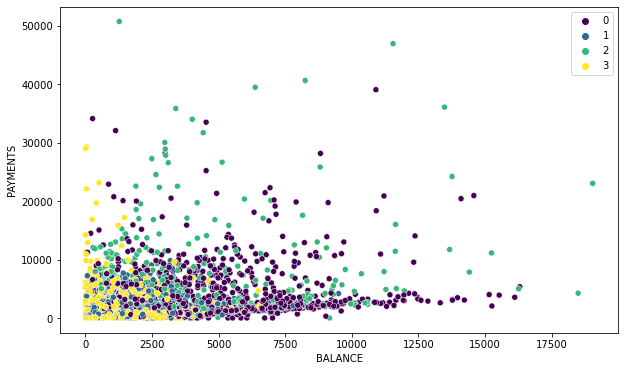

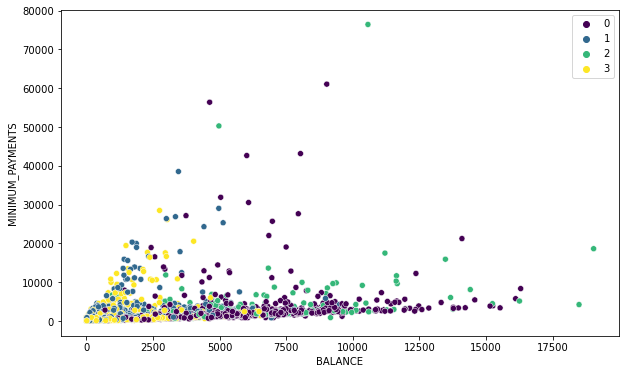

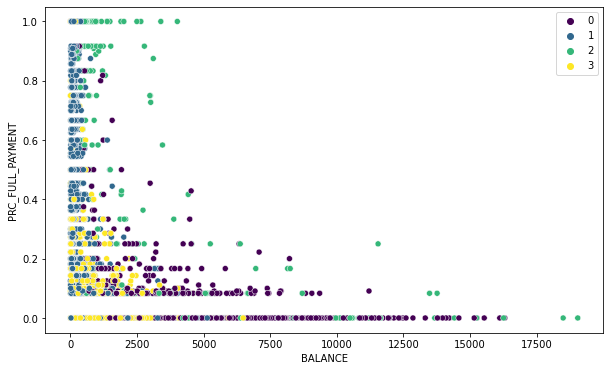

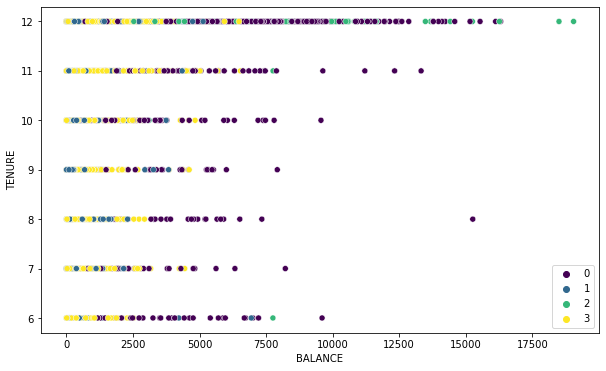

In [40]:
for col in df:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df,x="BALANCE",y=col,hue=labels,palette="viridis")
    plt.show()